## Dependencias

In [24]:
import seaborn
import pandas
import geopandas
from pysal.lib import weights
import numpy
import matplotlib.pyplot as plt

## Data
Barrios y Veredas
https://www.medellin.gov.co/geomedellin/datosAbiertos/234, https://www.medellin.gov.co/giscatalogacion/srv/spa/catalog.search#/metadata/61a04bc9-2991-4495-8491-7f18f40a2972

In [25]:
medellin = geopandas.read_file("data/barrios_y_veredas_mr.geojson")

In [26]:
medellin.head()

,OBJECTID,codigo,nombre,identificacion,limitecomunacorregimientoid,limitemunicipioid,subtipo_barriovereda,fecha_actualizacion,Shape_Length,Shape_Area,geometry
0,1,Inst_15,U.P.B,Inst_15,11,001,1,1418774400000,1872.110579,216519.300817,"POLYGON ((4713613.195 2248705.932, 4713601.395..."
1,2,Inst_18,Cerro Nutibara,Inst_18,16,001,1,1418774400000,2840.275369,399158.946697,"POLYGON ((4714984.017 2247909.523, 4714961.434..."
2,3,0610,Mirador del Doce,0610,06,001,1,1418774400000,1336.347402,64822.378858,"POLYGON ((4714157.227 2255420.732, 4714146.578..."
3,4,1620,El Nogal-Los Almendros,1620,16,001,1,1418774400000,3072.101126,248370.770989,"POLYGON ((4712900.496 2247841.179, 4712901.879..."
4,5,0612,El Triunfo,0612,06,001,1,1418774400000,1730.001961,117069.306574,"POLYGON ((4713973.756 2255960.810, 4713971.703..."


In [27]:
medellin.describe()

,OBJECTID,subtipo_barriovereda,fecha_actualizacion,Shape_Length,Shape_Area
count,332.000000,332.000000,3.320000e+02,332.000000,3.320000e+02
mean,166.500000,1.183735,1.418774e+12,4572.156419,1.133725e+06
std,95.984374,0.387852,0.000000e+00,4320.982615,2.512967e+06
min,1.000000,1.000000,1.418774e+12,750.570165,2.846434e+04
25%,83.750000,1.000000,1.418774e+12,2457.728552,2.397280e+05
50%,166.500000,1.000000,1.418774e+12,3073.160817,3.678561e+05
75%,249.250000,1.000000,1.418774e+12,4351.737949,6.578209e+05
max,332.000000,2.000000,1.418774e+12,34082.524583,2.223246e+07


## Pesos de contigüidad

### Contigüidad de torre

In [28]:
wr = weights.contiguity.Rook.from_dataframe(medellin)

/var/folders/kg/plkd97154_zf916xg8gj219h0000gn/T/ipykernel_7258/1801246121.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wr = weights.contiguity.Rook.from_dataframe(medellin)


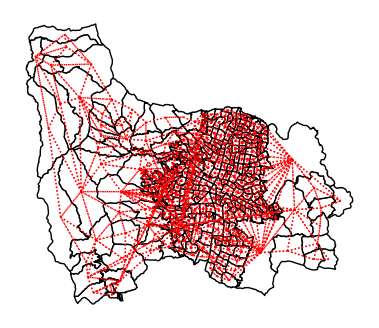

In [29]:
# Plot tract geography
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot the geography
medellin.plot(
    edgecolor="k", facecolor="w", ax=ax
)

# Plot graph connections
wr.plot(
    medellin,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)

# Remove the axis
ax.set_axis_off()

In [30]:
pandas.DataFrame(*wr.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,322,323,324,325,326,327,328,329,330,331
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
328,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
wr.nonzero

1882

In [32]:
wr.neighbors

{0: [256, 140, 98, 164],
 1: [66, 56, 153, 92, 57],
 2: [291, 4, 40, 148, 52, 249, 187, 125],
 3: [16, 176, 102, 121, 140],
 4: [249, 2, 291, 125],
 5: [145, 274, 117, 277, 21, 174],
 6: [65, 33, 229, 297, 77, 46],
 7: [260, 54, 231, 200, 25, 106, 155],
 8: [105, 114, 111],
 9: [81, 146, 248, 12, 120, 238, 79],
 10: [259, 181, 317, 44, 301],
 11: [275, 165, 70, 200, 137],
 12: [81, 146, 131, 130, 162, 9],
 13: [272, 65, 289, 135, 221, 173],
 14: [132, 68, 55, 71, 123, 108, 94],
 15: [225, 66, 194, 153, 219],
 16: [305, 3, 164, 102, 57, 171],
 17: [18, 212, 310],
 18: [17, 212, 310, 311],
 19: [225, 66, 163, 258, 43, 171],
 20: [163, 179, 118, 217, 330, 43, 253],
 21: [51, 147, 277, 5, 228, 174],
 22: [273, 132, 167, 94, 78, 239],
 23: [152, 317, 150, 246],
 24: [192, 304, 180, 264, 235, 104, 287],
 25: [260, 7, 200, 175, 147, 245, 54, 90],
 26: [164, 153, 27, 110, 303],
 27: [240, 130, 196, 186, 26],
 28: [178, 116, 237, 302, 31],
 29: [161, 114, 115, 230, 296, 111],
 30: [113, 100, 38

<Axes: xlabel='Number of Neighbors', ylabel='Frequency'>

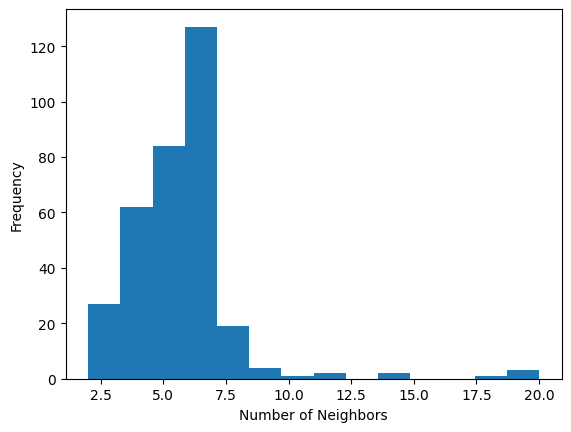

In [33]:
s = pandas.Series(wr.cardinalities)
s.plot.hist(bins=s.unique().shape[0], xlabel="Number of Neighbors", ylabel="Frequency")

In [34]:
s[s > 15]

86     20
125    19
200    19
317    18
dtype: int64

### Contigüidad de reina

In [35]:
w_queen = weights.contiguity.Queen.from_dataframe(medellin)

/var/folders/kg/plkd97154_zf916xg8gj219h0000gn/T/ipykernel_7258/3199273579.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.contiguity.Queen.from_dataframe(medellin)


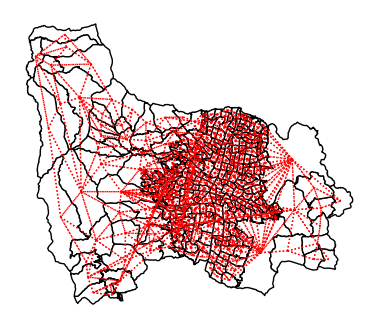

In [36]:
# Plot tract geography
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot the geography
medellin.plot(
    edgecolor="k", facecolor="w", ax=ax
)

# Plot graph connections
w_queen.plot(
    medellin,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)

# Remove the axis
ax.set_axis_off()

In [37]:
print(w_queen.n)
print(w_queen.pct_nonzero) # Porcentaje de elementos distintos de cero

332
1.8326317317462621


<Axes: xlabel='Number of Neighbors', ylabel='Frequency'>

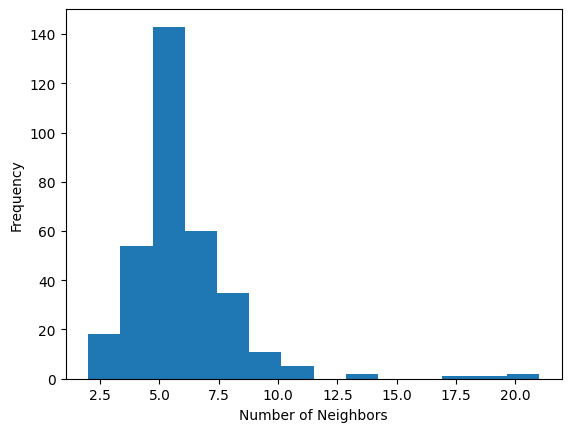

In [38]:
s = pandas.Series(w_queen.cardinalities)
s.plot.hist(bins=s.unique().shape[0], xlabel="Number of Neighbors", ylabel="Frequency")

In [39]:
s[s > 15]

86     21
125    20
200    19
317    18
dtype: int64

In [40]:
medellin.iloc[125]

OBJECTID                                                                     126
codigo                                                                      SN02
nombre                                                                Sin Nombre
identificacion                                                              SN02
limitecomunacorregimientoid                                                 SN02
limitemunicipioid                                                            001
subtipo_barriovereda                                                           2
fecha_actualizacion                                                1418774400000
Shape_Length                                                         7602.999842
Shape_Area                                                         132768.364148
geometry                       MULTIPOLYGON (((4716972.2313 2241523.572899997...
Name: 125, dtype: object

## Pesos basados en distancia

### k vecinos mas cercanos

In [41]:

wk4 = weights.distance.KNN.from_dataframe(medellin, k=4)

In [42]:
# Número de identificadores sin vecinos
wk4.islands

[]

In [43]:
# Los vecinos mas cercanos serian
wk4.neighbors

{0: [98, 256, 140, 164],
 1: [92, 56, 57, 153],
 2: [249, 40, 4, 187],
 3: [176, 102, 121, 140],
 4: [249, 2, 52, 40],
 5: [277, 274, 174, 21],
 6: [229, 297, 65, 33],
 7: [231, 54, 25, 106],
 8: [111, 114, 161, 105],
 9: [238, 146, 12, 248],
 10: [301, 181, 259, 44],
 11: [137, 70, 165, 62],
 12: [162, 146, 131, 9],
 13: [221, 65, 289, 55],
 14: [55, 132, 221, 68],
 15: [153, 225, 219, 56],
 16: [57, 305, 3, 0],
 17: [18, 311, 310, 212],
 18: [17, 311, 212, 310],
 19: [163, 258, 43, 80],
 20: [253, 330, 43, 217],
 21: [228, 51, 174, 277],
 22: [273, 94, 227, 132],
 23: [150, 152, 246, 45],
 24: [287, 264, 192, 235],
 25: [7, 231, 54, 90],
 26: [303, 110, 164, 92],
 27: [196, 130, 26, 303],
 28: [237, 31, 178, 277],
 29: [230, 111, 161, 8],
 30: [100, 113, 143, 38],
 31: [190, 28, 178, 302],
 32: [101, 128, 251, 93],
 33: [77, 58, 297, 268],
 34: [85, 74, 177, 35],
 35: [85, 329, 34, 177],
 36: [174, 51, 274, 259],
 37: [109, 170, 220, 134],
 38: [151, 143, 30, 93],
 39: [178, 244, 124

### Pesos de kernel
Reflejan el caso en el que se supone o se espera que la similitud o proximidad espacial disminuya con la distancia (pero ademas con una función de decaimiento).

In [44]:
w_kernel = weights.distance.Kernel.from_dataframe(medellin)

In [45]:
# Función de kernel implementada
w_kernel.function

'triangular'

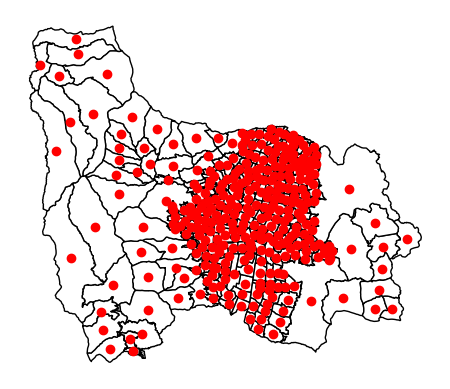

In [46]:
# Centroides
# Plot polygons
ax = medellin.plot(facecolor="w", edgecolor="k")
# Create and plot centroids
medellin.centroid.plot(color="r", ax=ax)
# Remove axis
ax.set_axis_off();

In [55]:
# Build weights with adaptive bandwidth
w_adaptive = weights.distance.Kernel.from_dataframe(
    medellin, fixed=False, k=25, function="quadratic"
)
# Para las observaciones separadas por distancias mayores que el ancho de banda, los pesos se establecen en cero

In [56]:
w_adaptive.bandwidth[:5]

array([[1756.3562925 ],
       [1920.26824844],
       [2245.17490359],
       [1810.03480917],
       [2694.53916992]])

In [57]:
# Pesos para el elemento 17 con otros elementos
w_adaptive[17]

{17: 0.75,
 18: 0.7449323598639708,
 311: 0.7139685017967288,
 310: 0.7073792226731626,
 212: 0.7001478377508799,
 313: 0.6173946409561776,
 312: 0.5971934041976336,
 213: 0.5466742893497312,
 316: 0.5050009529505868,
 314: 0.4640620447170035,
 292: 0.4489434734395989,
 315: 0.42799065821241244,
 319: 0.3872125449329511,
 293: 0.38595817193878856,
 322: 0.3091341077516149,
 267: 0.29723498473146714,
 320: 0.28543929666437307,
 323: 0.27520353397200714,
 290: 0.21476869815419322,
 321: 0.18785612907504345,
 278: 0.17902041073389388,
 328: 0.12345274084337932,
 214: 0.09320536320628864,
 318: 0.07040978890513822,
 281: 0.05137168766790082,
 283: 1.4999997777209728e-07}

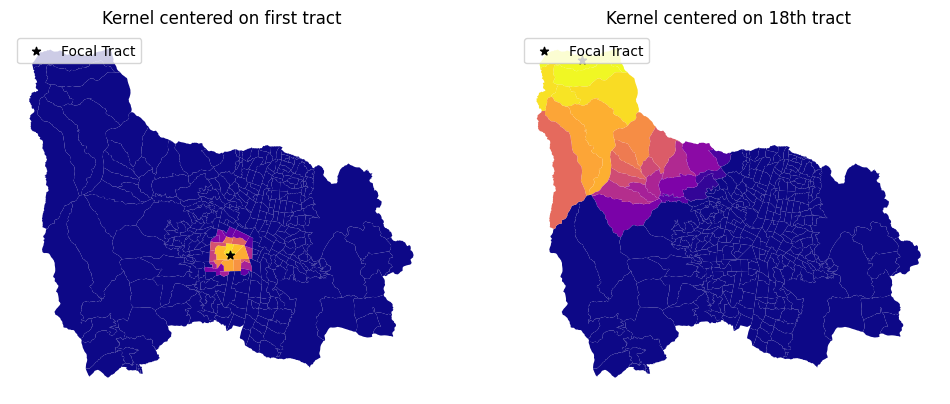

In [58]:
# Create full matrix version of weights
full_matrix, ids = w_adaptive.full()
# Set up figure with two subplots in a row
f, ax = plt.subplots(
    1, 2, figsize=(12, 6), subplot_kw=dict(aspect="equal")
)
# Append weights for first polygon and plot on first subplot
medellin.assign(weight_0=full_matrix[0]).plot(
    "weight_0", cmap="plasma", ax=ax[0]
)
# Append weights for 18th polygon and plot on first subplot
medellin.assign(weight_18=full_matrix[17]).plot(
    "weight_18", cmap="plasma", ax=ax[1]
)
# Add centroid of focal tracts
medellin.iloc[[0], :].centroid.plot(
    ax=ax[0], marker="*", color="k", label="Focal Tract"
)
medellin.iloc[[17], :].centroid.plot(
    ax=ax[1], marker="*", color="k", label="Focal Tract"
)
# Add titles
ax[0].set_title("Kernel centered on first tract")
ax[1].set_title("Kernel centered on 18th tract")
# Remove axis
[ax_.set_axis_off() for ax_ in ax]
# Add legend
[ax_.legend(loc="upper left") for ax_ in ax]

## Fuentes de datos

- `https://www.medellin.gov.co/geomedellin/datosAbiertos?id=1044`